In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("analisis.csv")
df

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


In [3]:
# determine how many different values has the column 'categoria'
df.groupby('categoria').size()

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64

In [4]:
# determine if is there any column with null values (if yes, then make values imputation)
df.isnull().sum()

usuario      0
op           0
co           0
ex           0
ag           0
ne           0
wordcount    0
categoria    0
dtype: int64

Here, we will focus only on the features, due to KMeans is an unsupervised algorithm.

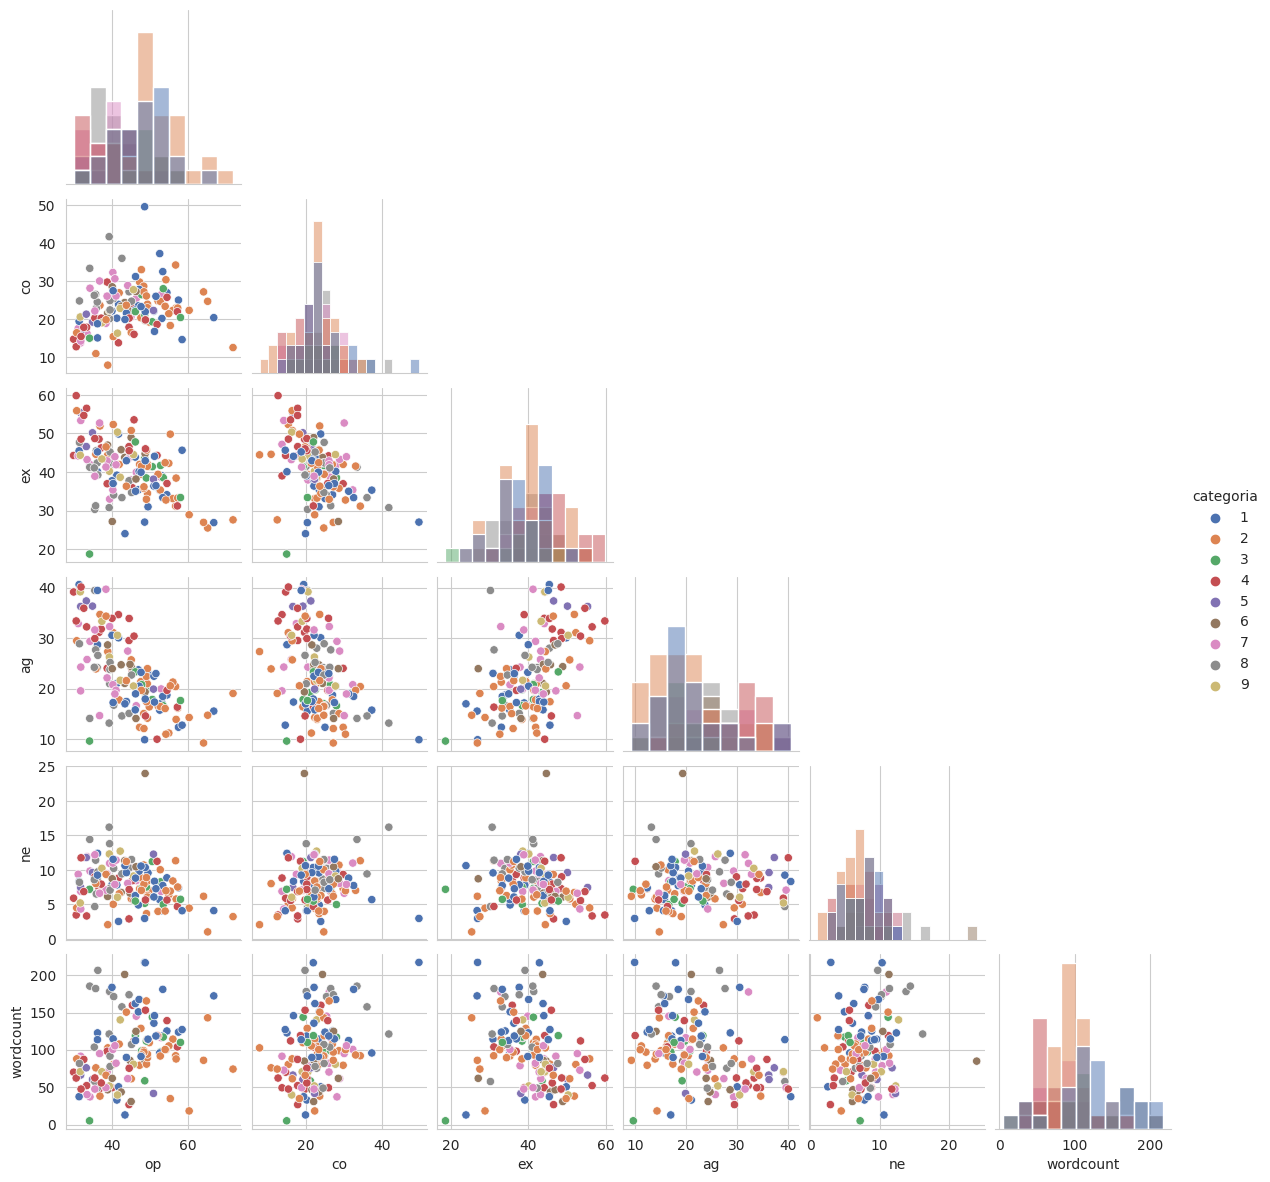

In [5]:
import seaborn as sns
sns.pairplot(df, hue='categoria', diag_kind="hist", dropna=True, vars=["op", "co", "ex", "ag", "ne", "wordcount"],
             height=2, corner=True, palette="deep")

No correlated variables are shown (in order to apply PCA previously to KMeans)

In [6]:
X = df.drop(columns=['usuario', 'categoria'], axis=1)
y = df[['categoria']].astype(int)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,op,co,ex,ag,ne,wordcount
0,-1.204996,0.892279,0.165428,0.845612,0.608075,-1.383060
1,0.068161,-0.422922,-0.394646,0.178325,0.780058,-0.447063
2,-0.319303,-1.592763,-0.246459,1.537014,0.276347,-1.110001
3,-0.480900,-1.311184,1.616460,1.069976,-0.980020,-0.409877
4,-0.923095,-0.575372,1.084760,1.077410,-0.229209,-1.159287
...,...,...,...,...,...,...
135,-1.053555,-0.145512,-0.259729,1.141040,1.387254,-1.148570
136,-1.483421,-1.304366,1.085083,2.251448,1.243071,-1.148110
137,3.249513,-1.809488,-1.842747,-0.501326,-1.571194,-0.547851
138,0.848401,0.523212,-0.600469,0.011749,-0.236145,0.446541


In [8]:
score = []
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k,
                    init='k-means++', # ...
                    tol=1e-4,
                    max_iter=300,     # Maximum number of iterations for each single run.
                    n_init=10,        # Number of times the algorithm is run independently with different centroid seeds,
                                      # Finally, it is chosen the (final) model as the one with the lowest inertia.
                    random_state=42)
    kmeans.fit(X_scaled)
    score.append(kmeans.score(X_scaled))
    inertia.append(kmeans.inertia_)

# ... ‘k-means++’ : selects initial cluster centroids using sampling based on an empirical probability distribution
# of the points’ contribution to the overall inertia. This technique speeds up convergence. The other possible value
# for this param is 'random', which locates initially centroids in random positions.
# The algorithm implemented is “greedy k-means++” (paper's link: https://arxiv.org/abs/1912.00653)

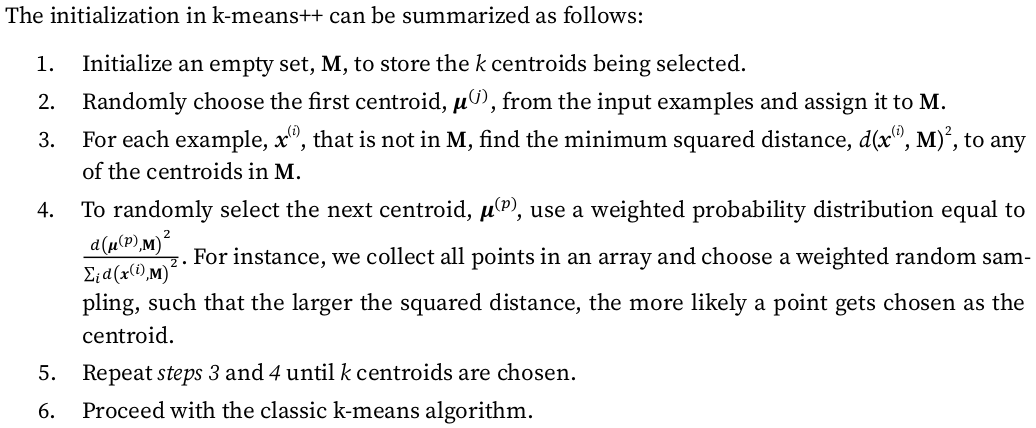

In [9]:
from IPython.display import Image
Image("./k-means++.png")

KMeans algorithm finishes until cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached. tol param corresponds to the relative tolerance with regards to Frobenius norm of the $\textbf{difference in the cluster centers of two consecutive iterations to declare convergence}$. Frobenius norm of a $m \times n$ matrix $A$ is defined as:

\begin{equation}
\| A \|_F := \sqrt{\sum_{i=1}^{m}\sum_{j=1}^{n}|a_{ij}|^{2}}
\end{equation}

On the other hand, the metric to be minimized is the within-cluster sum of squared errors (SSE) or inertia, defined as:

\begin{equation}
inertia := \sum_{i=1}^{n}\sum_{j=1}^{k}w^{(i,j)} \|\mathbf{x}^{(i)} - \mathbf{\mu}^{(j)}\|_{2}^{2}
\end{equation}

where $\mathbf{x}^{(i)}$ is the $i$-sample belonging to the cluster $j$ with centroid $\mathbf{\mu}^{(j)}$. The indices $j$ and $n$ refer to the number of clusters and the number of samples for each cluster, respectively. Additionally, the weights are defined as follows:

\begin{equation}
w^{(i,j)} = \begin{cases} 1, \hspace{0.8cm} if \hspace{0.5cm} \mathbf{x}^{(i)} \in j\\
                          0, \hspace{0.8cm} otherwise
            \end{cases}$$
\end{equation}


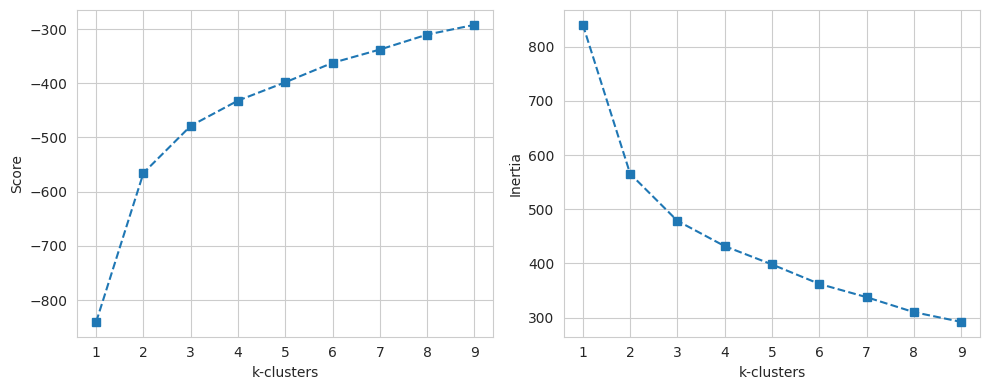

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].plot(k_values, score, marker='s', linestyle='--')
axes[0].set_xlabel('k-clusters')
axes[0].set_ylabel('Score')
axes[0].grid(True)

axes[1].plot(k_values, inertia, marker='s', linestyle='--')
axes[1].set_xlabel('k-clusters')
axes[1].set_ylabel('Inertia')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3).fit(X_scaled)
centroids_scaled = kmeans.cluster_centers_
centroids_scaled

array([[ 1.02104167,  0.00289202, -0.49877272, -0.80213085, -0.5464846 ,
         0.12052403],
       [-0.86145847, -0.63776745,  0.80241022,  1.04489745, -0.18847622,
        -0.7654834 ],
       [-0.06386559,  0.70573849, -0.3927942 , -0.35886631,  0.75590262,
         0.73001308]])

In [11]:
centroids = scaler.inverse_transform(centroids_scaled)
centroids

array([[ 52.98682522,  22.99389756,  37.19344549,  16.7984896 ,
          6.3451378 , 104.08532222],
       [ 37.18214966,  19.28060986,  46.5093148 ,  30.89080882,
          7.42932122,  64.610066  ],
       [ 43.87840238,  27.0676236 ,  37.95220278,  20.18047642,
         10.28925389, 131.24055333]])

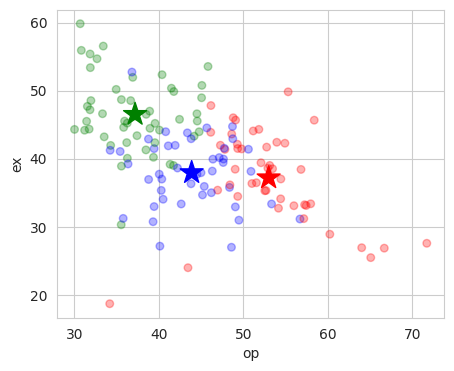

In [12]:
# Predicting the clusters for all instances
labels = kmeans.predict(X_scaled)

# Getting the cluster centers
C = centroids.copy()

colores=['red','green','blue']
asignar=[]

for row in labels:
    asignar.append(colores[row])

fig = plt.figure(figsize=(5,4))

# Here, we can choose any two variables (e.g. the first "ex" and third "op")
f1 = df['op'].values
f2 = df['ex'].values

plt.scatter(f1, f2, c=asignar, s=30, alpha=0.3)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=300)

plt.ylabel("ex")
plt.xlabel("op")

plt.show()

In the previous plot, some red point (in the left-down side) apparently should not belong to the red cluster because they seem to be closer to the blue cluster, but we must remember that the clustering fitting was 5-dimentional, which means that the plot only reflects the projection on the two displayed variables.